<a href="https://colab.research.google.com/github/GoradiaNishant/DSML/blob/main/Microfocus_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>LAB-1</H1>

<H1>read and fetch dataset methods</H1>

PANDAS LIB

In [ ]:
import pandas as pd
dataset=pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")

#check if the dataset is null or not
print(dataset.isnull())
dataset.isnull().sum()

        date  location  ...  biweekly_cases  biweekly_deaths
0      False     False  ...            True             True
1      False     False  ...            True             True
2      False     False  ...            True             True
3      False     False  ...            True             True
4      False     False  ...            True             True
...      ...       ...  ...             ...              ...
59349  False     False  ...           False            False
59350  False     False  ...           False            False
59351  False     False  ...           False            False
59352  False     False  ...           False            False
59353  False     False  ...           False            False

[59354 rows x 10 columns]


date                   0
location               0
new_cases            333
new_deaths           333
total_cases         3303
total_deaths       12940
weekly_cases        1132
weekly_deaths       1132
biweekly_cases      2637
biweekly_deaths     2637
dtype: int64

URLLIB

In [ ]:
import urllib 
url="https://covid.ourworldindata.org/data/ecdc/full_data.csv"
urllib.request.urlretrieve(url,"dataset_1.csv")

('dataset_1.csv', <http.client.HTTPMessage at 0x7f56128b2a90>)

In [ ]:
#display only first five rows
dataset.head()
#display only last five rows
dataset.tail()

date  location  ...  biweekly_cases  biweekly_deaths
59349  2020-11-25  Zimbabwe  ...           788.0             19.0
59350  2020-11-26  Zimbabwe  ...           841.0             19.0
59351  2020-11-27  Zimbabwe  ...           927.0             19.0
59352  2020-11-28  Zimbabwe  ...           949.0             18.0
59353  2020-11-29  Zimbabwe  ...          1036.0             18.0

[5 rows x 10 columns]

In [ ]:
#information of every columns with datatypes and with each entries
dataset.info()
dataset.describe()
#conforming missing values
print("dataset shape details :- ",dataset.shape)
dataset.columns
#To get perticular column
dataset['location']
dataset[['location','new_cases','new_deaths']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59354 entries, 0 to 59353
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             59354 non-null  object 
 1   location         59354 non-null  object 
 2   new_cases        59021 non-null  float64
 3   new_deaths       59021 non-null  float64
 4   total_cases      56051 non-null  float64
 5   total_deaths     46414 non-null  float64
 6   weekly_cases     58222 non-null  float64
 7   weekly_deaths    58222 non-null  float64
 8   biweekly_cases   56717 non-null  float64
 9   biweekly_deaths  56717 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.5+ MB
dataset shape details :-  (59354, 10)


location  new_cases  new_deaths
0      Afghanistan        0.0         0.0
1      Afghanistan        0.0         0.0
2      Afghanistan        0.0         0.0
3      Afghanistan        0.0         0.0
4      Afghanistan        0.0         0.0
...            ...        ...         ...
59349     Zimbabwe       90.0         1.0
59350     Zimbabwe      110.0         0.0
59351     Zimbabwe      115.0         0.0
59352     Zimbabwe       91.0         1.0
59353     Zimbabwe      108.0         0.0

[59354 rows x 3 columns]

In [ ]:
#simplifying dataset
print(dataset['location'].unique())

#deleting columns
dataset2=dataset.drop('biweekly_deaths',axis=1)
dataset=dataset.dropna()
dataset.info()

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala

In [ ]:
import datetime as dt
#manupaliting multiple data in dataset
dataset['date']=[dt.datetime.strptime(x,'%Y-%m-%d') for x in dataset['date']]


In [ ]:
#creating subdataset
countries= ['India', 'United States', 'Spain', 'Italy']
subdataset = dataset[dataset.location.isin(countries)]
subdataset.set_index('date',inplace=True)
subdataset = subdataset.fillna(0)
subdataset = subdataset.dropna()
subdataset['mortality_rate'] = subdataset['total_deaths'] / subdataset['weekly_cases']
subdataset

location  new_cases  ...  biweekly_deaths  mortality_rate
date                                  ...                                 
2019-12-31          India        0.0  ...              0.0             NaN
2020-01-01          India        0.0  ...              0.0             NaN
2020-01-02          India        0.0  ...              0.0             NaN
2020-01-03          India        0.0  ...              0.0             NaN
2020-01-04          India        0.0  ...              0.0             NaN
...                   ...        ...  ...              ...             ...
2020-11-25  United States   170293.0  ...          20242.0        0.211087
2020-11-26  United States   186589.0  ...          20466.0        0.210158
2020-11-27  United States   106091.0  ...          21025.0        0.225944
2020-11-28  United States   207913.0  ...          20514.0        0.224873
2020-11-29  United States   154893.0  ...          20463.0        0.229917

[1339 rows x 10 columns]

**Working with matplotlib**

In [ ]:
import matplotlib.pyplot as plt

# dataset.groupby('location')['new_cases'].count()

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
subdataset.groupby('location')['new_cases'].plot(ax=axes[0,0],legend=True)
subdataset.groupby('location')['new_deaths'].plot(ax=axes[0,1],legend=True)
subdataset.groupby('location')['total_cases'].plot(ax=axes[1,0],legend=True)
subdataset.groupby('location')['total_deaths'].plot(ax=axes[1,1],legend=True)

axes[0,0].set_title("new_cases")
axes[0,1].set_title("new_deaths")
axes[1,0].set_title("total_cases")
axes[1,1].set_title("total_deaths")

Text(0.5, 1.0, 'total_deaths')

<H1>LAB-2</H1>

**NUMPY and SCIPY**

basic array

In [ ]:
import numpy as np

#nparray operations
l1=[1,2,3]
print("list multiplication be like l1*2:-",l1*2)
a1=np.array(l1)
print("multiplication of array a1*2:-",a1*2)

# l1*l1 not possible but
print("a1*a1=",a1*a1)
#datatype
a1=np.array(l1,dtype='int16')
print("a1 dtype:- ",a1.dtype)
#shape 
a1.shape
#working with index 
print(a1[1]) #expected output :-2

list multiplication be like l1*2:- [1, 2, 3, 1, 2, 3]
multiplication of array a1*2:- [2 4 6]
a1*a1= [1 4 9]
a1 dtype:-  int16
2


**2D ARRAY**

In [ ]:
a2=np.array([[1,2,3],[4,5,6],[7,8,9]])
print("printing dimensional",a2.ndim)
#shape
a2.shape
a2.dtype

printing dimensional 2


dtype('int64')

In [ ]:
#index in 2D array
a2[1,2]  # expected o:- 6
a2[:2,:2] # 4x4 matrix


array([[1, 2],
       [4, 5]])

**3D Array**

In [ ]:
a3=np.array([[[1,2],[3,4]],[[5,6],[1,2]],[[3,4],[5,6]]])
print(a3.ndim)
print(a3.shape)
print(a3[1,1,0])
a3[1:,1:,1:]

3
(3, 2, 2)
1


array([[[2]],

       [[6]]])

**ZEROS & ONES Matrix**

In [ ]:
#ZEROS
z1=np.zeros(5,dtype='int64')
print("\n1D\n",z1)
z2=np.zeros((2,3),dtype='int64')
print("\n2D\n",z2)
z3=np.zeros((2,3,3),dtype='int64')
print("3D",z3)
#ONES
o1=np.zeros(5,dtype='int64')
print("\n1D\n",o1)
o2=np.zeros((2,3),dtype='int64')
print("\n2D\n",o2)
o3=np.zeros((2,3,3),dtype='int64')
print("\n3D",o3)


1D
 [0 0 0 0 0]

2D
 [[0 0 0]
 [0 0 0]]
3D [[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]

1D
 [0 0 0 0 0]

2D
 [[0 0 0]
 [0 0 0]]

3D [[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
#similar with desired numbers
t1=np.full((2, 2),10)
t1

array([[10, 10],
       [10, 10]])

In [ ]:
t2=np.identity(5,dtype='int32')
#or
t2=np.eye(5,dtype='int32')
t2

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int32)

In [ ]:
# trigo functions
a=np.array([12,23,43,32,22])
np.tan(a)
np.sin(a)
np.cos(a)

array([ 0.84385396, -0.53283302,  0.5551133 ,  0.83422336, -0.99996083])

**RE SHAPEING**

In [ ]:
#for reshaping or resize like images with res:-300x300
r=np.array([[1,2,3,7],[4,5,6,8]])
b=r.reshape((4,2))
c=r.reshape((2,2,2))
print(r,"\n","\n",b,"\n","\n",c)

[[1 2 3 7]
 [4 5 6 8]] 
 
 [[1 2]
 [3 7]
 [4 5]
 [6 8]] 
 
 [[[1 2]
  [3 7]]

 [[4 5]
  [6 8]]]


**RANDOM FUNCTION**

In [ ]:
import random
x=random.random()
#with range from a(2) to b(10)
z=random.randint(2,10)

7

In [ ]:
np.random.random()

0.7684019987043829

In [ ]:
lr1=np.random.sample(5)
lr1

array([0.7361167 , 0.86790328, 0.04519284, 0.14640023, 0.37528361])

In [ ]:
curr=[0,5,10,20,50,100,200,500,2000]
lucky=np.random.choice(curr)
lucky

2000

In [ ]:
import string
c=''.join(random.choices(string.ascii_letters+string.digits,k=5))
c

'aI287'

<H1>SCIPY</H1>

Any complex mathematical operation can be perform using SCIPY

In [ ]:
from scipy import linalg

In [ ]:
x=np.array([[1,2],[3,4]])

In [ ]:
ans=linalg.det(x)


-2.0

<H1>LAB 3</H1>

**Image Processing**

image.png

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Reading the image using cv2
image = cv2.imread('/content/image1.jpg')
# Display image
cv2_imshow(image)
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
# height, width and color channel
print("Image Statistics:")
print("-------------------------------")
print("> Type of Image : ", type(image))
print("> Height :", image.shape[0],"\n> Width :", image.shape[1],"\n> Color Channel(Dimensions):", image.shape[2])
print("> Size of Image : ", image.nbytes,"bytes")
print("> Min RGB Value in this image : ", np.min(image))
print("> Max RGB Value in this image : ", np.max(image))
print("dimensional:- ",image.ndim,"D")
print("-------------------------------")

Image Statistics:
-------------------------------
> Type of Image :  <class 'numpy.ndarray'>
> Height : 400 
> Width : 711 
> Color Channel(Dimensions): 3
> Size of Image :  853200 bytes
> Min RGB Value in this image :  0
> Max RGB Value in this image :  255
dimensional:-  3 D
-------------------------------


In [ ]:
# Extract the color channel
blue, green, red = cv2.split(image)
blue, green, red

(array([[20, 20, 20, ..., 26, 26, 26],
        [20, 20, 20, ..., 26, 26, 26],
        [20, 20, 20, ..., 26, 26, 26],
        ...,
        [47, 47, 48, ..., 31, 31, 31],
        [47, 47, 47, ..., 31, 31, 31],
        [47, 47, 47, ..., 31, 31, 31]], dtype=uint8),
 array([[14, 14, 14, ..., 20, 20, 20],
        [14, 14, 14, ..., 20, 20, 20],
        [14, 14, 14, ..., 20, 20, 20],
        ...,
        [42, 42, 43, ..., 25, 25, 25],
        [42, 42, 42, ..., 25, 25, 25],
        [42, 42, 42, ..., 25, 25, 25]], dtype=uint8),
 array([[15, 15, 15, ..., 21, 21, 21],
        [15, 15, 15, ..., 21, 21, 21],
        [15, 15, 15, ..., 21, 21, 21],
        ...,
        [41, 41, 42, ..., 26, 26, 26],
        [41, 41, 41, ..., 26, 26, 26],
        [41, 41, 41, ..., 26, 26, 26]], dtype=uint8))

In [ ]:
# Generate the Zero size Image with same shape of Origional Image
zeros = np.zeros(green.shape, dtype = np.uint8)

# Generate the Green color Image
Green_Image = cv2.merge((zeros,green,zeros))

# Display Image
cv2_imshow(Green_Image)

In [ ]:
# Generate the Zero size Image with same shape of Origional Image
zeros = np.zeros(green.shape, dtype = np.uint8)

# Generate the Green color Image
Blue_image = cv2.merge((blue,zeros,zeros))

# Display Image
cv2_imshow(Blue_image)

In [ ]:
# Generate the Zero size Image with same shape of Origional Image
zeros = np.zeros(green.shape, dtype = np.uint8)

# Generate the Green color Image
Red_image = cv2.merge((zeros,zeros,red))

# Display Image
cv2_imshow(Red_image)

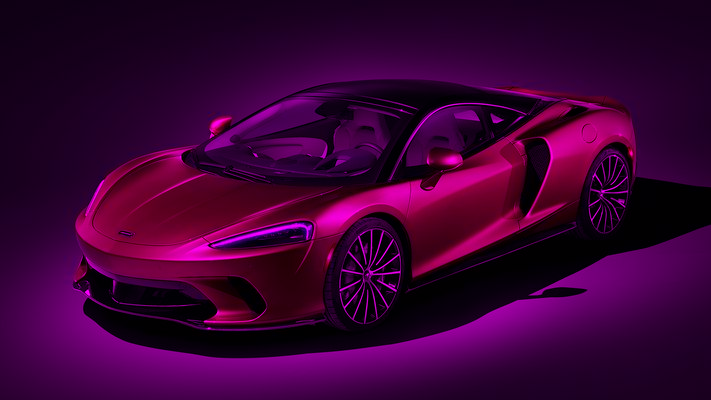

In [ ]:
# Generate the Zero size Image with same shape of Origional Image
zeros = np.zeros(blue.shape, dtype = np.uint8)

# Generate the combined channel color Image
BG_Image = cv2.merge((blue,zeros,red))

# Display Image
cv2_imshow(BG_Image)

<H1>LAB-4</H1>

Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# reading dataset
dataset=pd.read_csv("https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv",nrows=100)

dataset['Height'].hist()
#description of dataset
print(dataset.describe())
#finding missing values
dataset.isnull().sum()

           Height      Weight
count  100.000000  100.000000
mean    69.050776  186.847260
std      2.600337   19.301889
min     63.456494  149.173566
25%     67.238143  172.627025
50%     68.924121  186.209063
75%     71.200518  198.313516
max     75.205974  241.893563


Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
import seaborn as sns
sns.boxplot(dataset['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


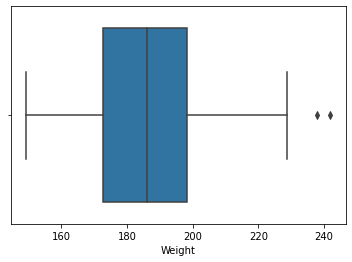

In [ ]:
sns.boxplot(dataset['Weight'])

In [ ]:
#dataset X and Y corelationn
dataset.corr()

Height    Weight
Height  1.000000  0.788306
Weight  0.788306  1.000000

In [ ]:
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:, 2].values

In [ ]:
# Spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((50, 1), (50, 1), (50,), (50,))

In [ ]:
# fitting split data in model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
regressor.score(X_train,Y_train)

0.6859887406649882

In [ ]:
y_pred = regressor.predict(X_test)
y_pred,Y_test
from sklearn.metrics import *
print("MAE :-",mean_absolute_error(y_pred,Y_test))
print("MAE :-",mean_squared_error(y_pred,Y_test))
print("RMSE:-",np.sqrt(mean_squared_error(y_pred,Y_test)))
print("R^2 :-",r2_score(y_pred,Y_test))

MAE :- 10.013133774804956
MAE :- 160.73830174515663
RMSE:- 12.678260990575822
R^2 :- 0.28553001999893624


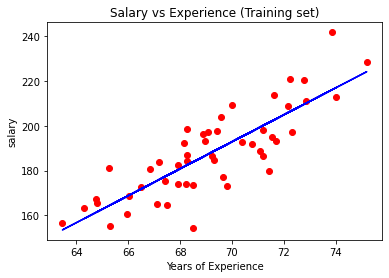

In [ ]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel("salary")
plt.show()

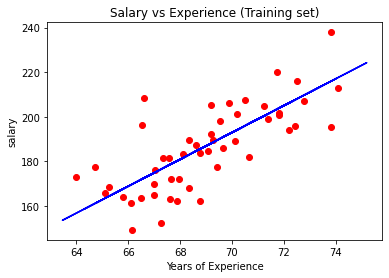

In [ ]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel("salary")
plt.show()

Excercise
https://lionbridge.ai/datasets/10-open-datasets-for-linear-regression/

Colab 
https://github.com/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_2_Regression_Analysis.ipynb

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2021-04-06 03:16:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   988KB/s    in 0.3s    

2021-04-06 03:16:06 (988 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [ ]:
import shutil
shutil.unpack_archive("/content/Bike-Sharing-Dataset.zip", ".")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

hour = pd.read_csv("/content/hour.csv")
day = pd.read_csv("/content/day.csv")

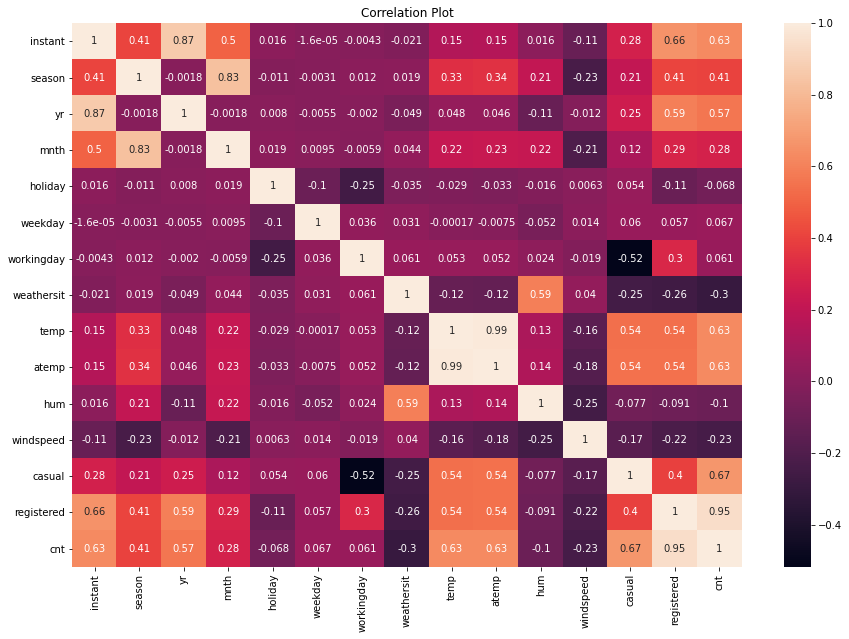

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(day.corr(), annot=True)
plt.title("Correlation Plot")
plt.show()

In [ ]:
multiX = ['instant','yr','temp', 'atemp', 'casual', 'registered']
X = day[multiX]
y = day['cnt']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print("Training R Score : ",mlr.score(X_train, y_train))
print("Testing R Score: ", mlr.score(X_test, y_test))
print("RMSE :", np.sqrt(mlr.predict(X_test)))

Training R Score :  1.0
Testing R Score:  1.0
RMSE : [81.2773031  39.37003937 61.21274377 77.72387021 86.82165628 85.22910301
 40.06245125 47.         86.59676668 75.78258375 42.3792402  55.3895297
 69.93568474 72.52585746 46.18441296 49.70915409 45.23273151 90.31057524
 73.22567856 47.93745926 87.73254812 73.91210997 73.54590403 43.26661531
 42.50882261 71.62401832 46.05431576 86.23224455 61.88699379 74.54528825
 52.3736575  60.36555309 78.71467462 86.56789243 76.92853827 58.06892456
 87.07468059 77.80102827 50.65570057 35.53871129 62.80127387 62.89674077
 87.06319544 70.04284403 83.46256646 26.55183609 66.76825593 72.78736154
 77.7367352  70.68238819 57.88782255 49.30517214 31.79622619 66.8954408
 68.73863542 68.75318174 48.93873721 57.88782255 69.19537557 84.70537173
 78.44106068 86.2670273  38.35361782 88.68483523 80.8084154  78.80989786
 86.04068805 65.58963333 45.57411546 85.63293759 55.83009941 40.43513324
 61.73329734 67.78642932 66.05300902 45.09988914 75.40557009 68.90573271


In [ ]:
y_pred = mlr.predict(X_test)

result = pd.DataFrame()
result["Y_Actual"] = y_test
result["Y_pred"] = y_pred
result

Y_Actual  Y_pred
703      6606  6606.0
33       1550  1550.0
300      3747  3747.0
456      6041  6041.0
633      7538  7538.0
..        ...     ...
70       2132  2132.0
192      4258  4258.0
328      2792  2792.0
165      5180  5180.0
135      3958  3958.0

[147 rows x 2 columns]

[[1.         0.63582213]
 [0.63582213 1.        ]]


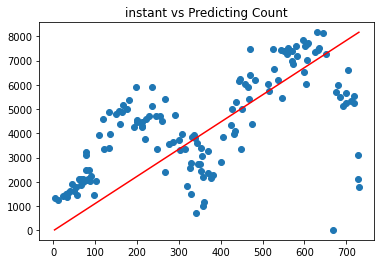

[[1.         0.62211024]
 [0.62211024 1.        ]]


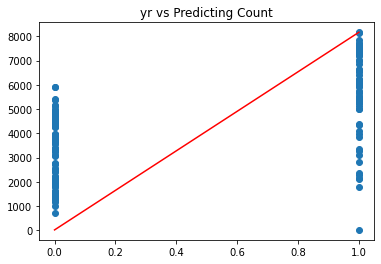

[[1.        0.6388457]
 [0.6388457 1.       ]]


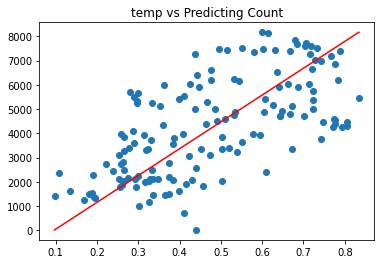

[[1.         0.64529942]
 [0.64529942 1.        ]]


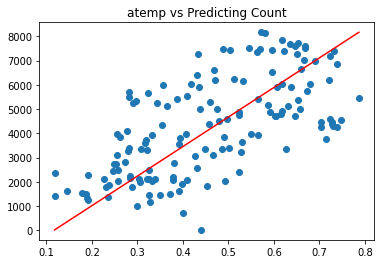

[[1.         0.66337518]
 [0.66337518 1.        ]]


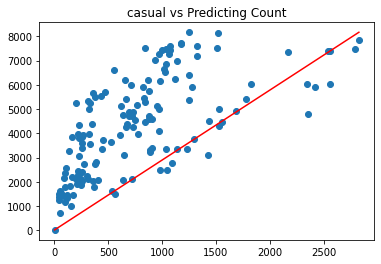

[[1.         0.95938343]
 [0.95938343 1.        ]]


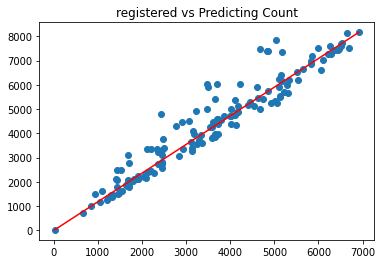

In [ ]:

for i in X_test.columns.tolist():
  plt.scatter(X_test[i], y_test) 
  print(np.corrcoef(X_test[i], y_pred))
  plt.plot([min(X_test[i]), max(X_test[i])], [min(y_pred), max(y_pred)], color='red')  # regression line
  plt.title(f"{i} vs Predicting Count")
  plt.show()

In [ ]:
weights = mlr.coef_.tolist()
cols = X.columns

In [ ]:
print("Y(cnt) = ", end = " " )
for x, w in zip(cols, weights):
  print(f"({x}) * {w}", end=" + ")
print(f"({mlr.intercept_})", end=" ")

Y(cnt) =  (instant) * -9.864707531115842e-16 + (yr) * 4.68070027181966e-13 + (temp) * 1.284896830860277e-12 + (atemp) * 5.137537954330281e-12 + (casual) * 1.0 + (registered) * 1.0000000000000004 + (-4.547473508864641e-12) 

Excersice


In [ ]:
import pandas as pd
dataset=pd.read_csv("/content/cancerdataset.csv")

In [ ]:
dataset

County  ...  Upper 95% Confidence Interval for Trend
0                                    United States  ...                                     -2.2
1                           Perry County, Kentucky  ...                                      1.6
2                          Powell County, Kentucky  ...                                      3.4
3                      North Slope Borough, Alaska  ...                                       **
4                          Owsley County, Kentucky  ...                                      4.8
...                                            ...  ...                                      ...
3136  Yakutat City and Borough, Alaska<sup>3</sup>  ...                                       **
3137             Yukon-Koyukuk Census Area, Alaska  ...                                       **
3138                          Zapata County, Texas  ...                                        *
3139                          Zavala County, Texas  ...                                       **
3140                  Ziebach County, South Dakota  ...                                       **

[3141 rows x 11 columns]

In [ ]:
dataset.isnull().sum()

County                                          0
FIPS                                            0
Met Objective of 45.5? (1)                      0
Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
Average Deaths per Year                         0
Recent Trend (2)                                0
Recent 5-Year Trend (2) in Death Rates          0
Lower 95% Confidence Interval for Trend         0
Upper 95% Confidence Interval for Trend         0
dtype: int64

In [ ]:
# Download Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv


--2021-04-07 10:17:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.02s   

2021-04-07 10:17:00 (3.37 MB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2021-04-07 10:17:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[=====

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# dataset1=pd.read_csv("/content/winequality-red.csv",sep=";")
dataset1=pd.read_csv("/content/winequality-white.csv",sep=";")

In [ ]:
dataset1.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

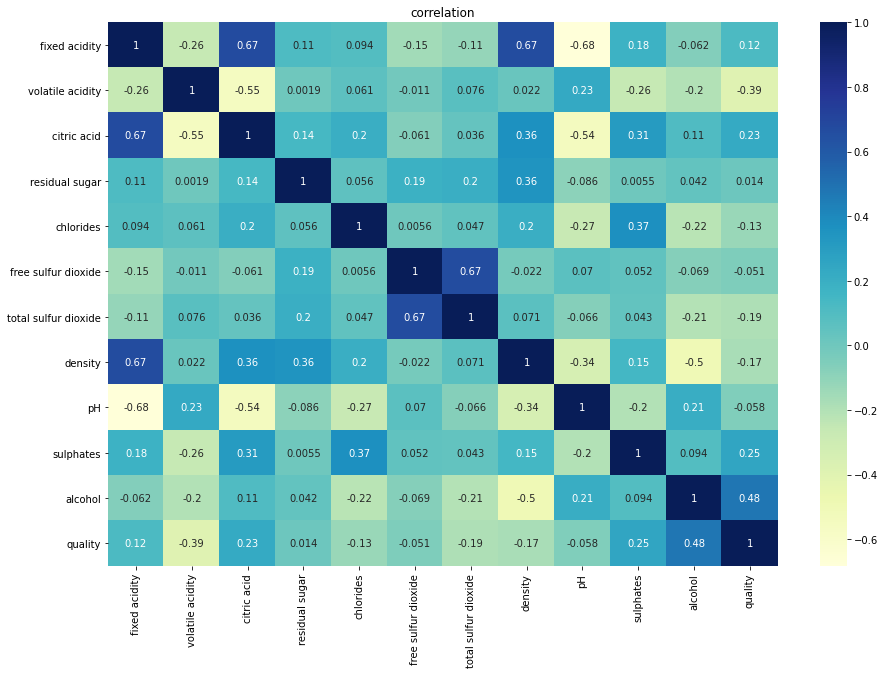

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset1.corr(),annot=True,cmap="YlGnBu")
plt.title("correlation")
plt.show()

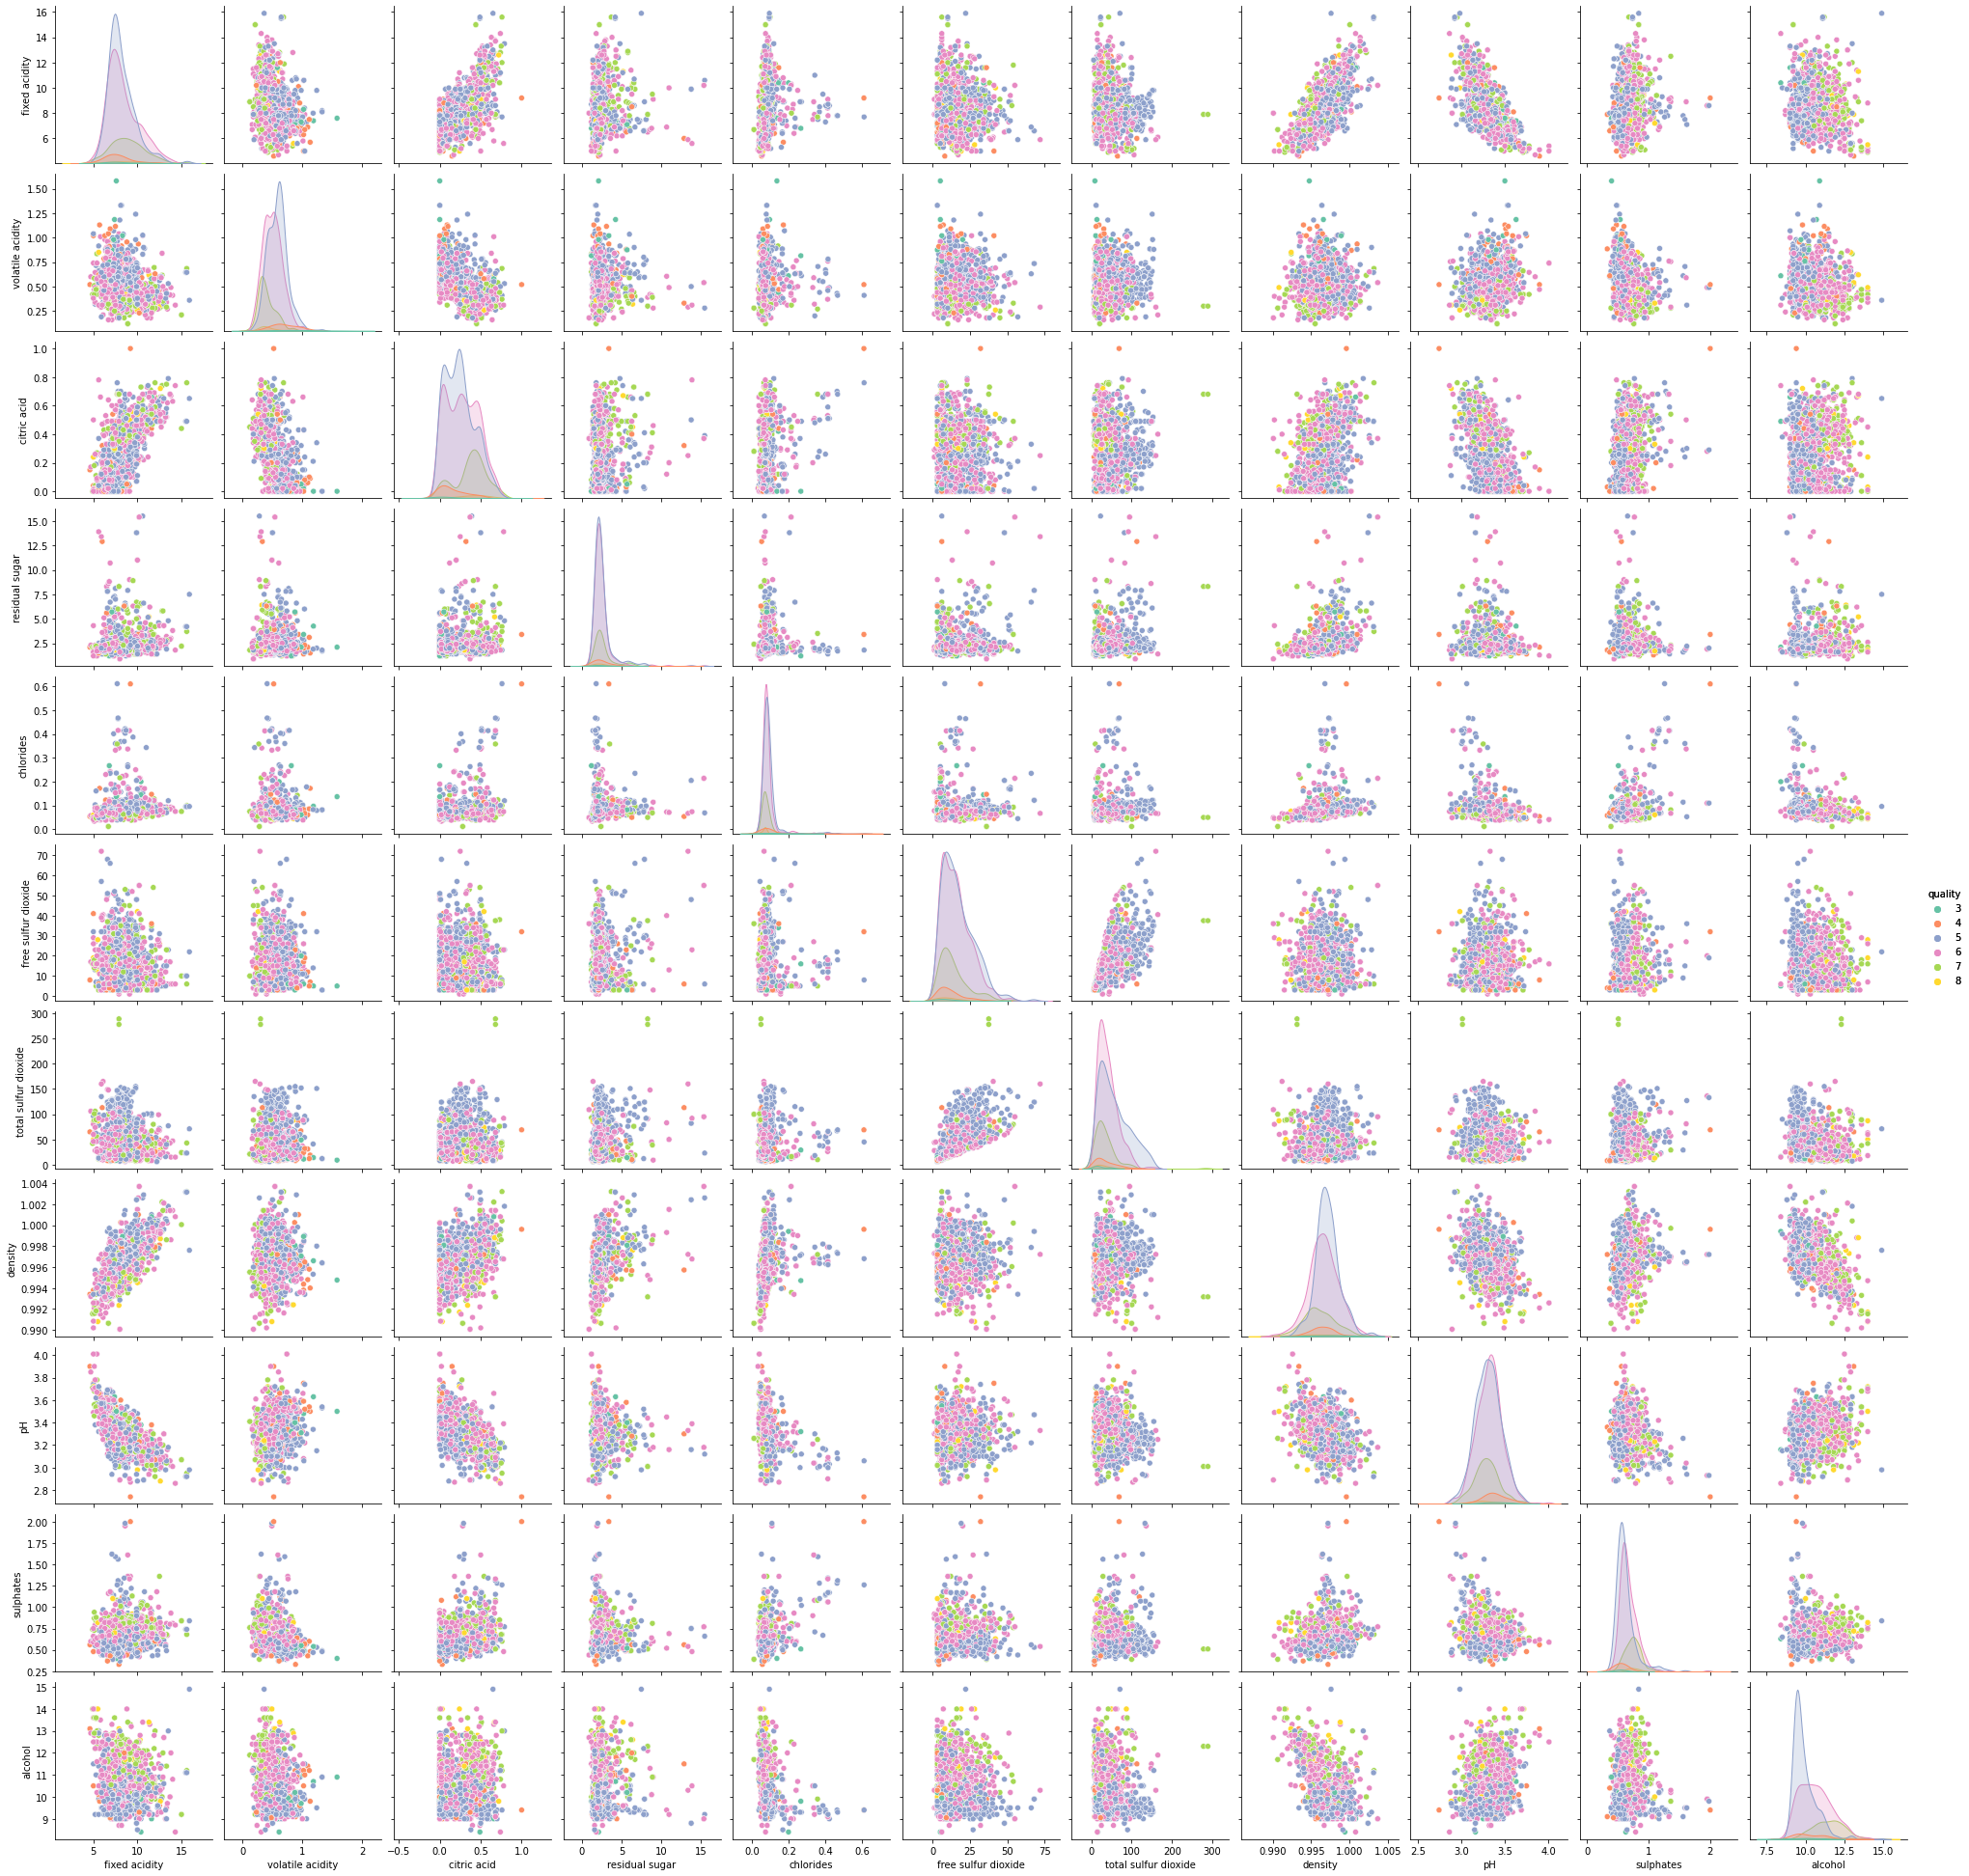

In [ ]:
g=sns.pairplot(dataset1,hue="quality",palette="Set2",diag_kind="kde",height=2.5)
g.add_legend()

In [ ]:
X=dataset1.iloc[:,:11]
Y=dataset1.iloc[:,11]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
for i in [X_train, X_test,Y_train, Y_test ]:
  print(i.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

mlr=LinearRegression()
mlr.fit(X_train,Y_train)

Y_pred=mlr.predict(X_test)

print("MAE :-",mean_absolute_error(Y_pred,Y_test))
print("MAE :-",mean_squared_error(Y_pred,Y_test))
print("RMSE:-",np.sqrt(mean_squared_error(Y_pred,Y_test)))

MAE :- 0.47482985287630297
MAE :- 0.3830719815814279
RMSE:- 0.6189280908000766


In [ ]:
mlr.intercept_

40.446226024103815

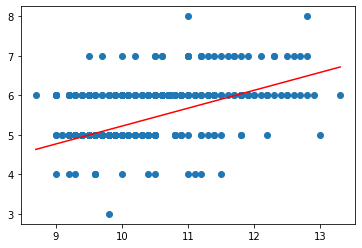

In [ ]:
plt.scatter(X_test["alcohol"],Y_test)
plt.plot([min(X_test["alcohol"]),max(X_test["alcohol"])],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import *

mlr=Lasso()
mlr.fit(X_train,Y_train)

Y_pred=mlr.predict(X_test)

print("MAE :-",mean_absolute_error(Y_pred,Y_test))
print("MAE :-",mean_squared_error(Y_pred,Y_test))
print("RMSE:-",np.sqrt(mean_squared_error(Y_pred,Y_test)))

MAE :- 0.6474809421422986
MAE :- 0.5741358133981237
RMSE:- 0.7577175023701932


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

mlr=KNeighborsClassifier()
mlr.fit(X_train,Y_train)

Y_pred=mlr.predict(X_test)

print("MAE :-",mean_absolute_error(Y_pred,Y_test))
print("MAE :-",mean_squared_error(Y_pred,Y_test))
print("RMSE:-",np.sqrt(mean_squared_error(Y_pred,Y_test)))

MAE :- 0.45
MAE :- 0.55
RMSE:- 0.7416198487095663


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred,Y_test

(array([5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6, 5, 6,
        6, 6, 5, 6, 7, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 6, 5, 7, 5, 5, 6,
        5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
        7, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 7,
        5, 6, 5, 6, 5, 6, 7, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5,
        6, 5, 7, 5, 5, 7, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5,
        6, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 7, 5, 6,
        6, 6, 7, 6, 5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5,
        5, 5, 5, 5, 6, 6, 6, 5, 7, 6, 5, 5, 4, 5, 6, 6, 6, 5, 6, 5, 6, 5,
        5, 5, 6, 5, 7, 6, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6,
        5, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 6, 7, 6, 5, 6, 6, 5, 4, 5, 6, 5,
        5, 5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5,
        5, 6, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 5,
        6, 5, 5, 6, 6, 6, 6, 6, 7, 5, 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]) * 100)

100.0


In [ ]:
cm[0][0], cm[0][1] , cm[1][0], cm[1][1]

(0, 0, 0, 1)